In [2]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Sample data
dates = pd.date_range('2020-01-01', periods=100)
values = np.random.randn(100).cumsum()

# Create a Plotly figure
fig = go.Figure()

# Add time series data
fig.add_trace(go.Scatter(x=dates, y=values, mode='lines', name='Time Series Data'))

# Add shapes to highlight phases
fig.add_shape(
    type="rect",
    x0="2020-01-15", y0=min(values), x1="2020-02-15", y1=max(values),
    line=dict(color="Red"),
    fillcolor="rgba(255, 0, 0, 0.3)"  # Phase 1
)

fig.add_shape(
    type="rect",
    x0="2020-02-16", y0=min(values), x1="2020-03-15", y1=max(values),
    line=dict(color="Blue"),
    fillcolor="rgba(0, 0, 255, 0.3)"  # Phase 2
)

# Add annotations for the phases
fig.add_annotation(
    x="2020-02-01", y=max(values) * 0.8,  # Adjust y for vertical position
    text="Phase 1",
    showarrow=False,
    font=dict(color="Red")
)

fig.add_annotation(
    x="2020-03-01", y=max(values) * 0.8,  # Adjust y for vertical position
    text="Phase 2",
    showarrow=False,
    font=dict(color="Blue")
)

# Update layout
fig.update_layout(
    title='Time Series Plot with Phases',
    xaxis_title='Date',
    yaxis_title='Values',
    showlegend=True
)

# Show the figure
fig.show()





In [10]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go

# Generate example time series data
np.random.seed(0)
time = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))  # Cumulative sum to simulate a time series

# Create a DataFrame
df = pd.DataFrame({'Time': time, 'Values': values})

# Calculate the simple difference between consecutive values
df['Difference'] = df['Values'].diff()

# Set up the Plotly scatter plots
fig = go.Figure()

# Original time series data
fig.add_trace(go.Scatter(x=df['Time'], y=df['Values'], mode='lines+markers', name='Original Data'))

# Difference data
fig.add_trace(go.Scatter(x=df['Time'], y=df['Difference'], mode='lines+markers', name='Difference'))

# Update layout for readability
fig.update_layout(
    title="Time Series and Its First-Order Difference",
    xaxis_title="Time",
    yaxis_title="Values",
    legend=dict(x=0, y=1),
    template="plotly_dark"
)

fig.show()



/tmp/ipykernel_1898625/478576697.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



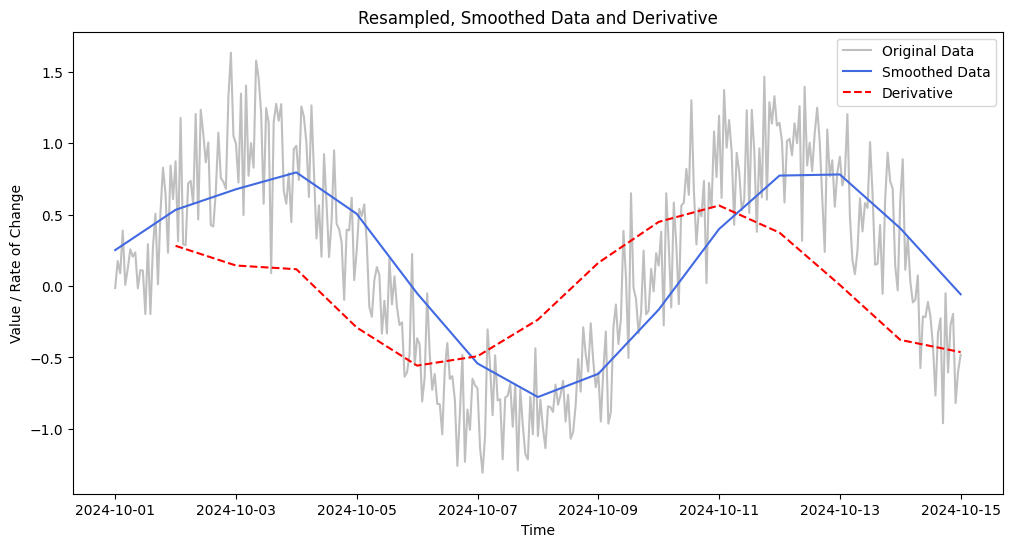

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Sample data generation
dates = pd.date_range(start="2024-10-01", end="2024-10-15", freq="H")
values = np.sin(np.linspace(0, 10, len(dates))) + np.random.normal(0, 0.3, len(dates))
df = pd.DataFrame(values, index=dates, columns=["value"])

# Function to resample, smooth, and compute derivative
def resample_smooth_derivative(df, col_name, resample_freq='D', rolling_window=3):
    # Resample to daily frequency, then apply smoothing
    df_resampled = df[col_name].resample(resample_freq).mean()
    df_smoothed = df_resampled.rolling(window=rolling_window, min_periods=1).mean()
    
    # Compute derivative
    df_derivative = df_smoothed.diff().dropna()  # Drop NaNs after diff
    
    # Plotting with Plotly
    fig = go.Figure()
    
    # Original, resampled, and smoothed data
    fig.add_trace(go.Scatter(x=df.index, y=df[col_name], mode='lines', name='Original Data', opacity=0.5))
    fig.add_trace(go.Scatter(x=df_smoothed.index, y=df_smoothed, mode='lines', name='Smoothed Data',
                             line=dict(color='royalblue', width=2)))
    
    # Derivative of smoothed data
    fig.add_trace(go.Scatter(x=df_derivative.index, y=df_derivative, mode='lines', name='Derivative',
                             line=dict(color='red', width=2, dash='dot')))
    
    # Layout adjustments
    fig.update_layout(
        title="Time Series with Resampling, Smoothing, and Derivative",
        xaxis_title="Time",
        yaxis_title="Values",
        template="plotly_white"
    )
    
    fig.show()
    
    # Optional Matplotlib plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[col_name], label="Original Data", color='gray', alpha=0.5)
    plt.plot(df_smoothed.index, df_smoothed, label="Smoothed Data", color='royalblue')
    plt.plot(df_derivative.index, df_derivative, label="Derivative", color='red', linestyle='--')
    
    plt.title("Resampled, Smoothed Data and Derivative")
    plt.xlabel("Time")
    plt.ylabel("Value / Rate of Change")
    plt.legend()
    plt.show()

# Run the function to visualize
resample_smooth_derivative(df, 'value', resample_freq='D', rolling_window=3)
